In [ ]:
أكتب دالة تستقبل قائمة أرقام وتُرجع فقط الأرقام الزوجية.

In [2]:
 def get_even_numbers(numbers):
    evens = []
    for n in numbers:
        if n % 2 == 0:
            evens.append(n)
    return evens

nums = [1, 2, 3, 4, 5, 6]
print(get_even_numbers(nums))   # [2, 4, 6]


[2, 4, 6]


In [ ]:
أكتب دالة تستقبل قائمة أرقام وتُرجع فقط الأرقام فردية.

In [3]:
def get_even_numbers(numbers):
    evens = []
    for n in numbers:
        if n % 2 == 1:
            evens.append(n)
    return evens

nums = [1, 2, 3, 4, 5, 6]
print(get_even_numbers(nums))   # [2, 4, 6]


[1, 3, 5]


In [ ]:
أكتب دالة تستقبل نص وتُرجع قاموس يحتوي عدد تكرار كل كلمة.

In [4]:
def word_count(text):
    words = text.split()
    freq = {}

    for w in words:
        if w in freq:
            freq[w] += 1
        else:
            freq[w] = 1

    return freq

print(word_count("apple orange apple banana apple"))


{'apple': 3, 'orange': 1, 'banana': 1}


In [ ]:
أكتب دالة تأخذ أسماء الطلاب في قائمة، وترجع درجاتهم من القاموس.

In [5]:
grades = {
    "Ali": 90,
    "Sara": 85,
    "Omar": 78
}

def get_students_grades(names, grade_dict):
    result = []
    for name in names:
        result.append(grade_dict.get(name, "Not Found"))
    return result

students = ["Ali", "Omar", "Mona"]
print(get_students_grades(students, grades))


[90, 78, 'Not Found']


In [ ]:
اكتب دالة تستقبل قائمة أرقام وتُرجع القائمة مرتبة من الأصغر إلى الأكبر بدون استخدام sort().

In [6]:
 def sort_list(nums):
    for i in range(len(nums)):
        for j in range(len(nums)-1):
            if nums[j] > nums[j+1]:
                nums[j], nums[j+1] = nums[j+1], nums[j]
    return nums

print(sort_list([5, 1, 4, 2, 3]))


[1, 2, 3, 4, 5]


In [ ]:
اكتب دالة تستقبل قائمة أرقام وتُرجع القائمة مرتبة من الأصغر إلى الأكبر بدون استخدام sort().

In [7]:
def list_to_dict(pairs):
    result = {}
    for key, value in pairs:
        result[key] = value
    return result

data = [("name", "Ali"), ("age", 20), ("city", "Riyadh")]
print(list_to_dict(data))


{'name': 'Ali', 'age': 20, 'city': 'Riyadh'}


In [9]:

# ملف: numpy_project_demo.py
import numpy as np
def demo():
    a = np.arange(12).reshape(3,4)
    print("a:\n", a)
    v = np.array([1,2,3,4])
    print("a + v:", a + v)
if __name__ == "__main__":
    demo()


a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a + v: [[ 1  3  5  7]
 [ 5  7  9 11]
 [ 9 11 13 15]]


In [21]:
print(df.columns)


NameError: name 'df' is not defined

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\Balaban\AppData\Local\Temp\ipykernel_1804\3122859829.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Balaban\AppData\Local\Temp\ipykernel_1804\3122859829.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

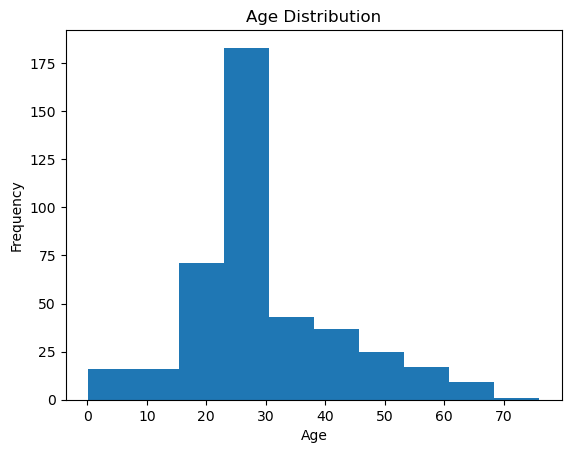

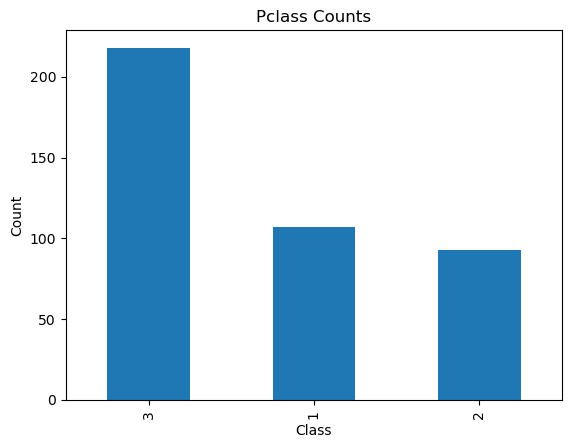

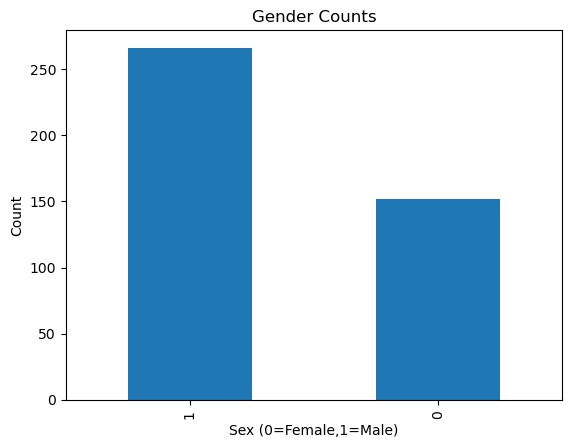

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path

df = pd.read_csv(r"C:\Users\Balaban\Downloads\archive\tested.csv")


# ==============================
# 1. تحميل البيانات
# ==============================

# ==============================
# 2. تنظيف البيانات
# ==============================

# القيم المفقودة
missing = df.isna().sum()
print("Missing values:\n", missing)

# تعويض البيانات المفقودة
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Label Encoding
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# ==============================
# 3. التحليل الاستكشافي EDA
# ==============================

plt.figure()
df['Age'].plot(kind='hist')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

plt.figure()
df['Pclass'].value_counts().plot(kind='bar')
plt.title("Pclass Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure()
df['Sex'].value_counts().plot(kind='bar')
plt.title("Gender Counts")
plt.xlabel("Sex (0=Female,1=Male)")
plt.ylabel("Count")
plt.show()

# ==============================
# 4. إنشاء خصائص Feature Engineering
# ==============================

# حجم العائلة
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# استخراج اللقب من الاسم
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'] = LabelEncoder().fit_transform(df['Title'].astype(str))

# تقسيم العمر إلى فئات
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 40, 60, 120],
    labels=[0, 1, 2, 3, 4]
)

# ==============================
# 5. بناء نموذج التنبؤ
# ==============================

features = ['Pclass','Sex','Age','Fare','FamilySize','Title']
X = df[features]
y = df['Survived']

# تقسيم البيانات تدريب/اختبار
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# نموذج Random Forest
model = RandomForestClassifier()


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ---------------------------------------
# 1) تحميل البيانات
# ---------------------------------------
df = pd.read_csv(r"C:\Users\Balaban\Downloads\archive\tested.csv")

print("Columns in dataset:")
print(df.columns)
print("\nMissing values:")
print(df.isna().sum())

# ---------------------------------------
# 2) حذف الأعمدة قليلة الفائدة
# ---------------------------------------
if "Cabin" in df.columns:
    df.drop("Cabin", axis=1, inplace=True)

# ---------------------------------------
# 3) معالجة القيم المفقودة
# ---------------------------------------
if "Age" in df.columns:
    df["Age"].fillna(df["Age"].mean(), inplace=True)

if "Fare" in df.columns:
    df["Fare"].fillna(df["Fare"].mean(), inplace=True)

if "Embarked" in df.columns:
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# ---------------------------------------
# 4) تحويل النصوص إلى أرقام
# ---------------------------------------
le = LabelEncoder()

if "Sex" in df.columns:
    df["Sex"] = le.fit_transform(df["Sex"])

if "Embarked" in df.columns:
    df["Embarked"] = le.fit_transform(df["Embarked"])

# ---------------------------------------
# 5) شرح بياناتك (بدون تدريب النموذج)
# ---------------------------------------
print("\nDataset after cleaning:")
print(df.head())

# إذا لم يوجد Survived → لا ندرب نموذج
if "Survived" not in df.columns:
    print("\n⚠️ لا يوجد عمود Survived — لا يمكن تدريب نموذج ML، فقط تمت معالجة البيانات.")
else:
    print("\n✔️ يوجد Survived — يمكن تدريب نموذج ML إذا أردت.")


Columns in dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Dataset after cleaning:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                     Myles, Mr. Thomas Francis    1  62.0      0      0   
3                      

C:\Users\Balaban\AppData\Local\Temp\ipykernel_1804\2005286588.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\Balaban\AppData\Local\Temp\ipykernel_1804\2005286588.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [26]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
